# Датасет "Toy Dataset"

## Описание проекта
Мы проводим исследование фиктивного датасета для разведочного анализа данных (EDA) и тестирования простых моделей прогнозирования. Датасет содержит 150000 строк и 6 колонок.

Ссылка на датасет [Toy Dataset]: https://www.kaggle.com/datasets/carlolepelaars/toy-dataset

## Цель проекта
Построить график "Скрипичная диаграмма" для произвольной колонки данных и выполнить основные шаги EDA, включая удаление пропусков и построение различных графиков. На основании проведенного анализа сделать выводы о наборе данных.

## Описание датасета
### Колонки
1. **Number:** Простой индекс для каждой строки.
2. **City:** Местоположение человека (Dallas, New York City, Los Angeles, Mountain View, Boston, Washington D.C., San Diego и Austin).
3. **Gender:** Пол человека (Male или Female).
4. **Age:** Возраст человека (от 25 до 65 лет).
5. **Income:** Годовой доход человека (от -674 до 177175).
6. **Illness:** Болен ли человек? (Yes или No).

## План по выполнению проекта
1. Загрузить данные и изучить их.
2. Заполнить пропущенные значения и обработать аномалии.
3. Построить график "Скрипичная диаграмма" для произвольной колонки.

# Подключение библиотеки и импорт данных

In [1]:
# Подключаем все необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Загрузим данные

In [2]:
# Получаем датасет
try:
    df = pd.read_csv('toy_dataset.csv', delimiter=',')
    print('Загружен датасет')
except Exception as ex:
    print('Отсутствует датасет. Проверьте путь файла')
    print('Error:', ex)

Загружен датасет


# Анализ данных

## Изучим данные

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


In [4]:
# Привести названия всех колонок к нижнему регистру
df.columns = df.columns.str.lower()

In [5]:
df.head()

,number,city,gender,age,income,illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [6]:
df.tail()

,number,city,gender,age,income,illness
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No
149999,150000,Austin,Female,37,87251.0,No


In [7]:
df.describe()

,number,age,income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


##### Анализ описательной статистики
- **number:** Индексы распределены равномерно от 1 до 150000.
- **age:** Средний возраст примерно 45 лет, с небольшим стандартным отклонением. Минимальный возраст 25 лет, максимальный - 65 лет.
- **income:** Средний годовой доход около $91253, но с отрицательным минимальным значением, что может быть артефактом или ошибкой в данных.

## Ящик с усами (Анализ выбросов)

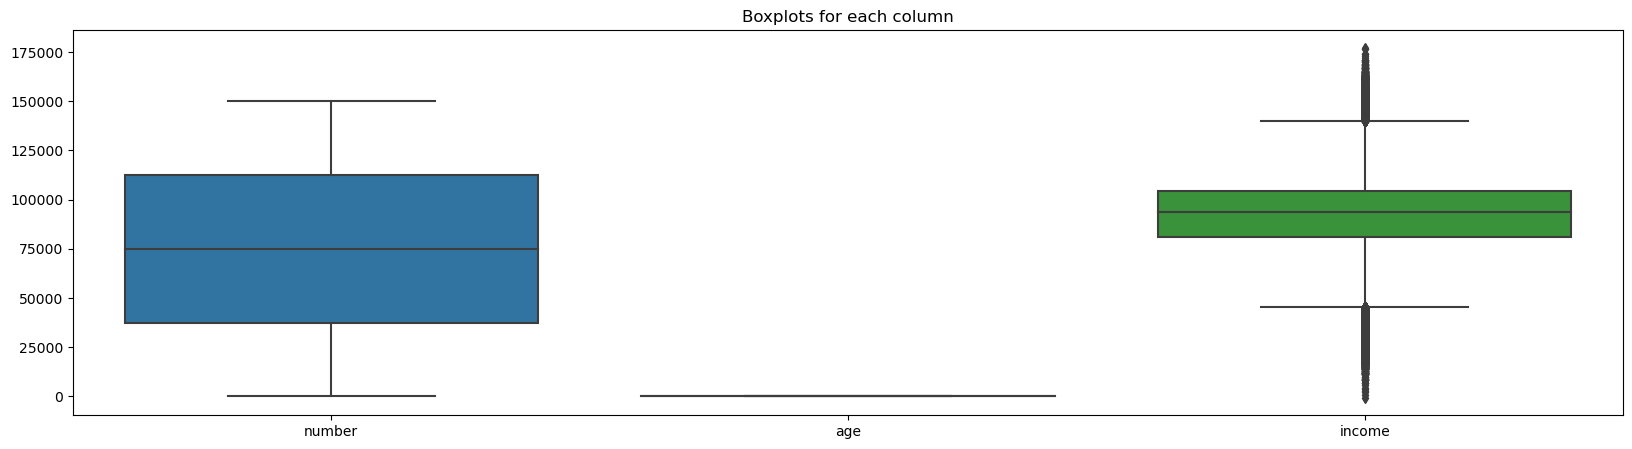

In [8]:
plt.figure(figsize=(20, 5))
sb.boxplot(data=df)
plt.title("Boxplots for each column")
plt.show()

Виден огромный выброс у колонки `income`, устраняем

In [9]:
# Скорпируем
df_clean = df.copy()

In [10]:
# Очистим
df_clean = df_clean[df_clean['income'] > (df_clean.describe()['income']['25%'] - df_clean.describe()['income']['std'])]
df_clean = df_clean[df_clean['income'] < (df_clean.describe()['income']['75%'] + df_clean.describe()['income']['std'])]

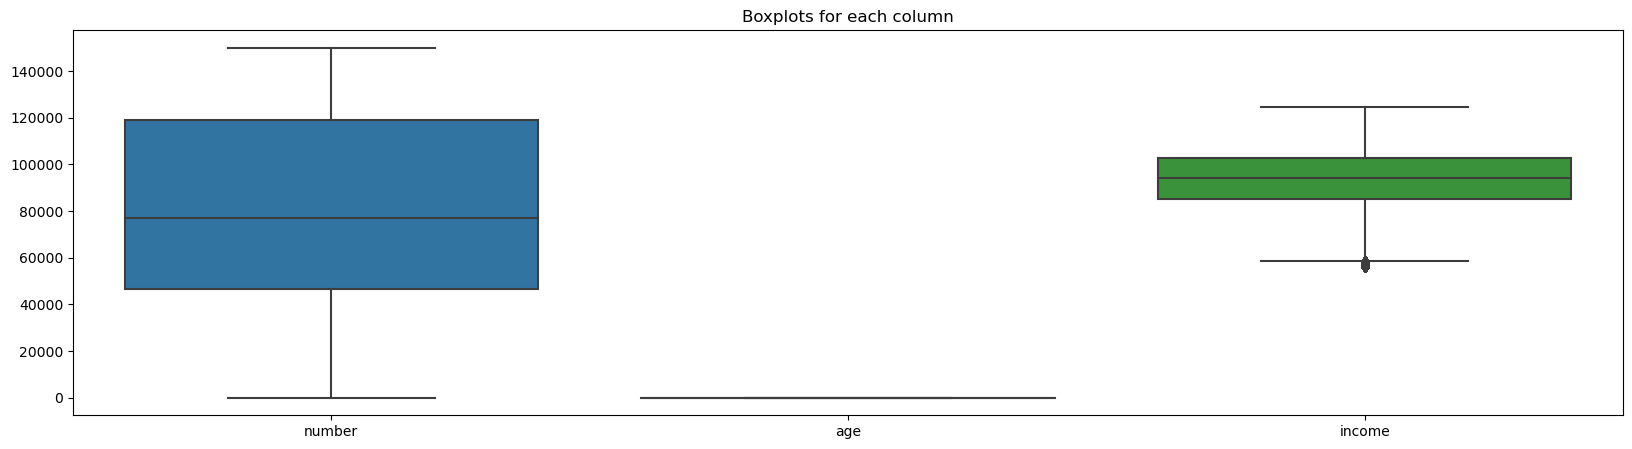

In [11]:
plt.figure(figsize=(20, 5))
sb.boxplot(data=df_clean)
plt.title("Boxplots for each column")
plt.show()

Получилось более менее нормально, с минимальным выбросом

## Пропуски

In [12]:
df_clean.isna().sum()

number     0
city       0
gender     0
age        0
income     0
illness    0
dtype: int64

Отсутствует пропущенные значения. Давайте искусственно создадим их.

In [13]:
# Заменяем часть значений в одном или нескольких признаках на пропуски
# Пусть, давайте, например, заменим 10% значений в столбце 'income' на пропуски
percentage_of_missing_values = 0.1
num_of_values_to_replace = int(len(df_clean) * percentage_of_missing_values)
indices_to_replace = np.random.choice(df_clean.index, num_of_values_to_replace, replace=False)
df_clean.loc[indices_to_replace, 'income'] = np.nan

In [14]:
# Снова выводим информацию о пропусках
df_clean.isna().sum()

number         0
city           0
gender         0
age            0
income     12080
illness        0
dtype: int64

## Дублирующие значения

In [15]:
# Кол-во дублириющие значения
df_clean.duplicated().sum()

0

Отсутствует дублирующие значения

## Удаление неинформативного признака

Существует колонка - `number`, которая по сути является как индексация датафрейма, поэтому устраняем их

In [16]:
df_clean = df_clean.drop('number', axis=1)

In [17]:
df_clean.head()

,city,gender,age,income,illness
8,Dallas,Male,51,68667.0,No
12,Dallas,Male,46,62749.0,No
26,Dallas,Male,58,57322.0,No
27,Dallas,Male,44,61704.0,No
33,Dallas,Male,27,56645.0,No


## Обработка категориальных признаков

Можно закодировать названия города, но это потребуется для машинного обучения, поэтому колонку `illness` преобразуем в булевый тип

In [18]:
df_clean['illness'] = df_clean['illness'].replace({'Yes': True, 'No': False})

In [19]:
df_clean['gender'] = df_clean['gender'].replace({'Male': True, 'Female': False})

## Создание нового признака

### Группировка по возрастам

Создадим функцию, которая группирует данных по возрастам и создания новой колонки

In [20]:
df_clean['age'].value_counts().sort_index()

25    1502
26    3186
27    3061
28    3092
29    3099
30    2965
31    3017
32    3022
33    3016
34    2981
35    2925
36    3053
37    3049
38    3057
39    2975
40    3009
41    3101
42    3018
43    3103
44    3023
45    2935
46    3007
47    3088
48    2976
49    3057
50    3017
51    2972
52    3017
53    3030
54    3140
55    2900
56    2896
57    2965
58    3058
59    3027
60    2858
61    3020
62    2960
63    3032
64    3116
65    1475
Name: age, dtype: int64

In [21]:
def create_age_group(df):
    # Задаем группы возрастов и метки
    age_bins = [25, 35, 45, 55, 65]
    age_labels = ['25-34', '35-44', '45-54', '55-65']
    
    # Создаем новую колонку 'Age_Group' на основе групп возрастов
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
    
    return df

In [22]:
# Создадим
df_clean = create_age_group(df_clean)

In [23]:
df_clean['age_group'].unique()

['45-54', '55-65', '35-44', '25-34', NaN]
Categories (4, object): ['25-34' < '35-44' < '45-54' < '55-65']

In [24]:
df_clean = df_clean.dropna(subset=['age_group'])

In [25]:
df_clean['age_group'].value_counts().sort_index()

25-34    28941
35-44    30313
45-54    30239
55-65    29832
Name: age_group, dtype: int64

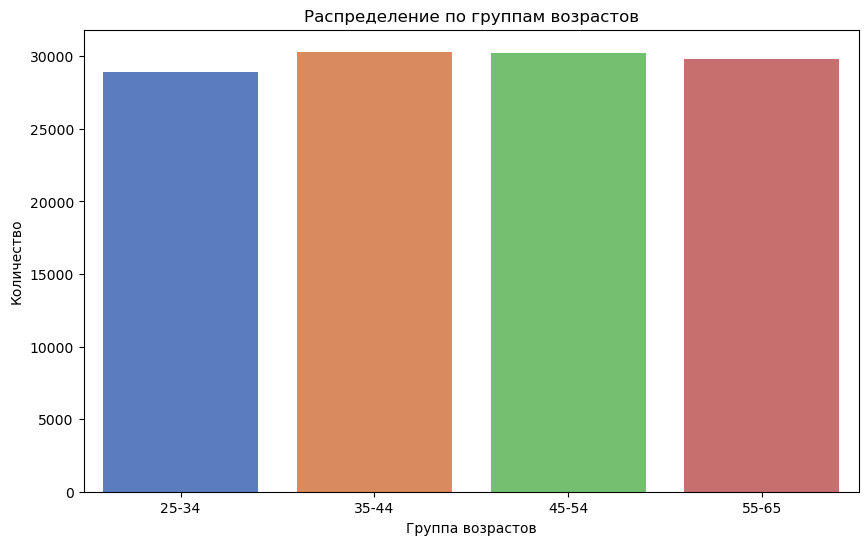

In [26]:
# Создаем график
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму для групп возрастов
sb.countplot(x='age_group', data=df_clean, palette='muted')

# Добавляем заголовок и подписи
plt.title('Распределение по группам возрастов')
plt.xlabel('Группа возрастов')
plt.ylabel('Количество')

# Отображаем график
plt.show()

Как и видно, что все возрасты группы примерно равномерны одинаковы

### Группировка по уровня дохода

Создадим функцию, которая группирует данных по уровня дохода и по категории "Низкий", "Средний" и "Высокий" на основе заданных порогов

In [27]:
print('Максимальный доход', df_clean['income'].max())
print('Средний доход', df_clean['income'].mean())
print('Медианный доход', df_clean['income'].median())
print('Минимальный доход', df_clean['income'].min())
print('Минимальный доход', df_clean['income'].std())

Максимальный доход 124731.0
Средний доход 93471.03311326113
Медианный доход 94314.0
Минимальный доход 55880.0
Минимальный доход 13761.662100896563


In [28]:
def categorize_income(df, low_threshold, high_threshold):
    # low_threshold: Порог для низкого дохода
    # high_threshold: Порог для высокого дохода

    df['income_level'] = pd.cut(df['income'], bins=[float('-inf'), low_threshold, high_threshold, float('inf')],
                                labels=['Низкий', 'Средний', 'Высокий'], include_lowest=True, right=False)
    return df

In [29]:
high_threshold = round(df_clean['income'].max() - df_clean['income'].std(), 3)
print('Порог для высокого дохода:', high_threshold)

Порог для высокого дохода: 110969.338


In [30]:
low_threshold = round(df_clean['income'].min() + df_clean['income'].std(), 3)
print('Порог для низкого дохода:', low_threshold)

Порог для низкого дохода: 69641.662


In [31]:
df_clean = categorize_income(df_clean, low_threshold=low_threshold, high_threshold=high_threshold)

In [32]:
df_clean.income_level.value_counts()

Средний    90912
Высокий    10005
Низкий      6472
Name: income_level, dtype: int64

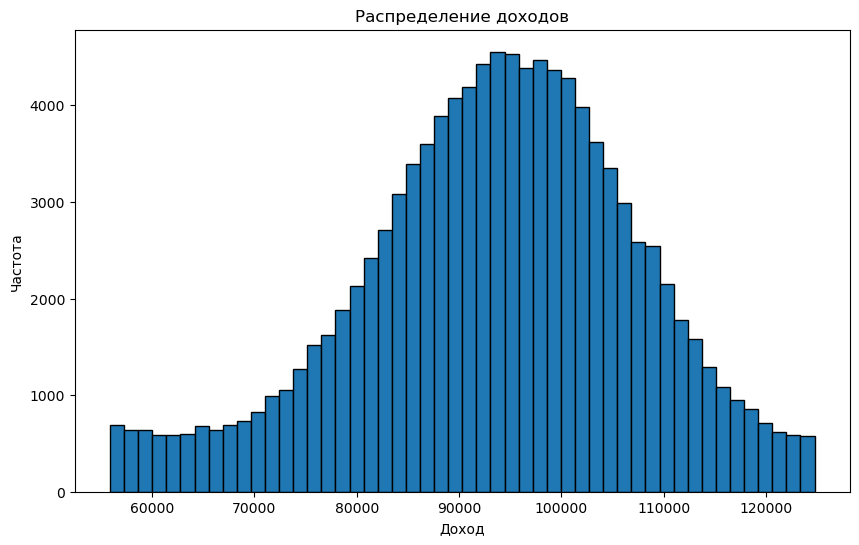

In [33]:
plt.figure(figsize=(10, 6))

plt.hist(df_clean['income'], bins=50, edgecolor='black')

plt.title('Распределение доходов')
plt.xlabel('Доход')
plt.ylabel('Частота')

plt.show()

Изобразим еще один график созданного нового признака

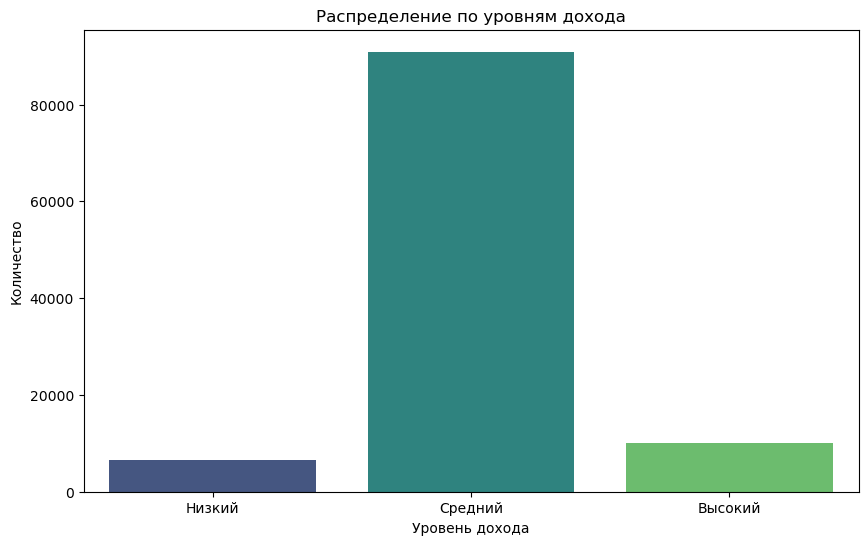

In [34]:
# Создаем график
plt.figure(figsize=(10, 6))

sb.countplot(x='income_level', data=df_clean, palette='viridis')

plt.title('Распределение по уровням дохода')
plt.xlabel('Уровень дохода')
plt.ylabel('Количество')

plt.show()

Сразу видно, что преобладает средний уровень дохода

## Распределение городов и наличие болезней

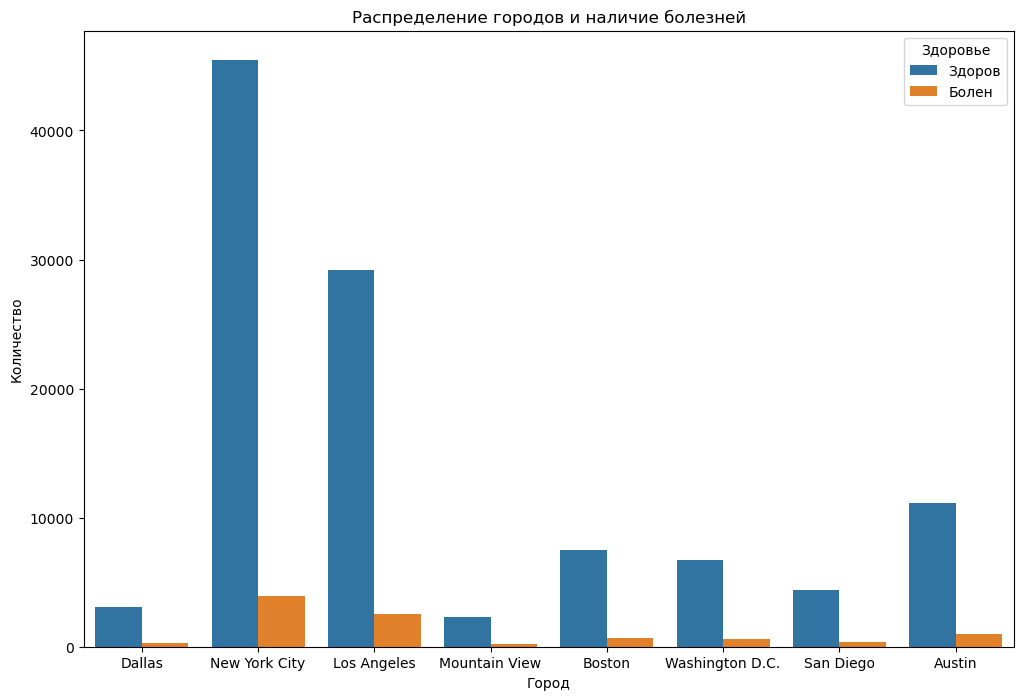

In [35]:
plt.figure(figsize=(12, 8))
sb.countplot(x='city', hue='illness', data=df_clean)
plt.title('Распределение городов и наличие болезней')
plt.xlabel('Город')
plt.ylabel('Количество')
# Добавление подписей
plt.legend(title='Здоровье', labels=['Здоров', 'Болен'])
plt.show()

Как видим, что в густонаселенных городах мы часто сталкиваемся с риском по шансу схватиться с вирусными заболеваниями.


## Доход в разрезе пола

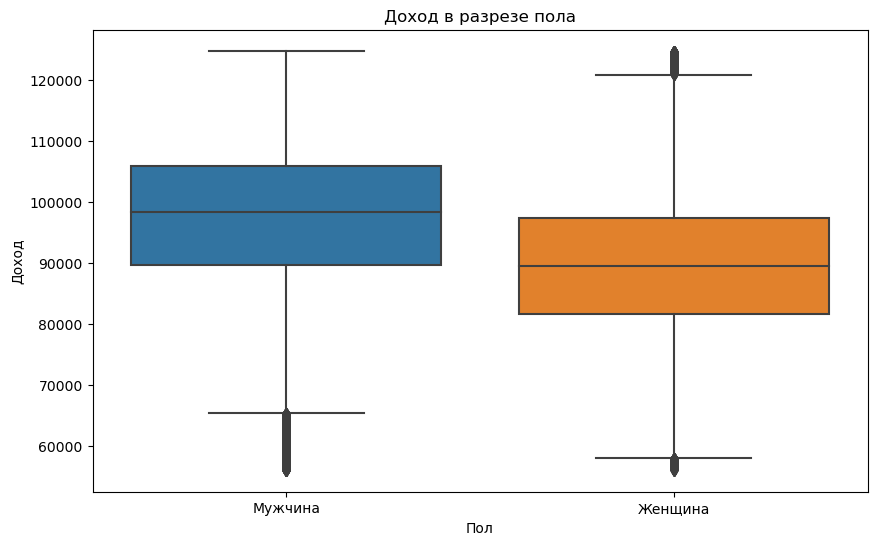

In [36]:
plt.figure(figsize=(10, 6))
sb.boxplot(x=df_clean['gender'].replace({True: 'Мужчина', False: 'Женщина'}), y='income', data=df)
plt.title('Доход в разрезе пола')
plt.xlabel('Пол')
plt.ylabel('Доход')
plt.show()

Будет проще рассмотреть по группировкам

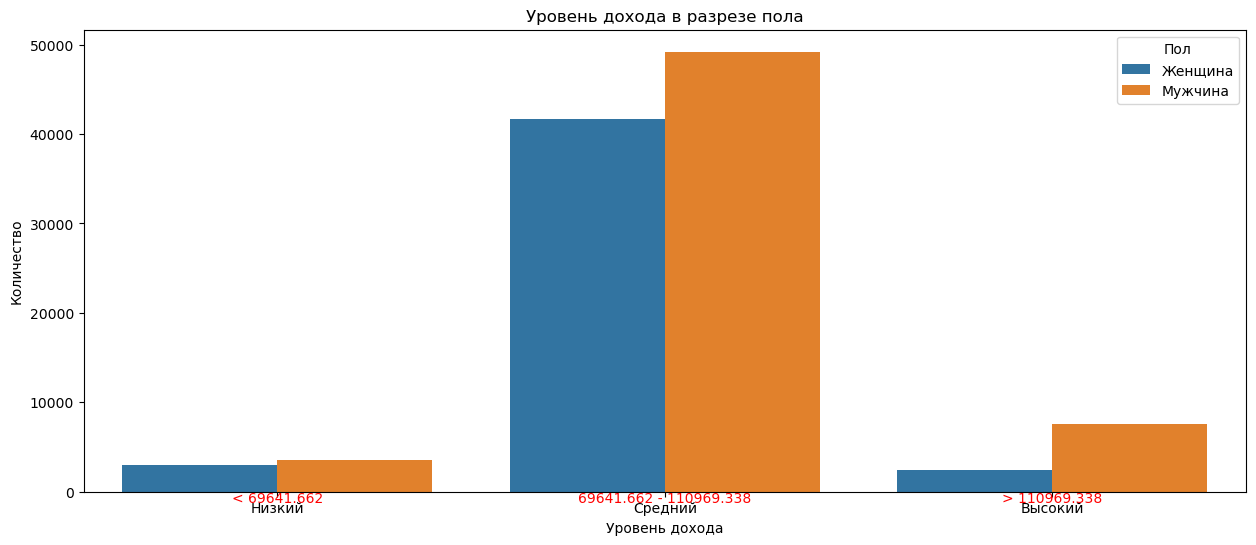

In [37]:
plt.figure(figsize=(15, 6))
sb.countplot(x='income_level', hue='gender', data=df_clean, order=['Низкий', 'Средний', 'Высокий'])
plt.title('Уровень дохода в разрезе пола')
plt.xlabel('Уровень дохода')
plt.ylabel('Количество')
plt.legend(title='Пол', labels=['Женщина', 'Мужчина'])

# Добавляем подписи под графиком
plt.text(0.0, 0, f'< {low_threshold}', ha='center', va='top', fontsize=10, color='red')
plt.text(1.0, 0, f'{low_threshold} - {high_threshold}', ha='center', va='top', fontsize=10, color='red')
plt.text(2.0, 0, f'> {high_threshold}', ha='center', va='top', fontsize=10, color='red')

plt.show()

Сразу видно, что мужчины преобладает по большей заработной платы нежели представительницы прекрасного пола

## Распределения пола и наличия болезней

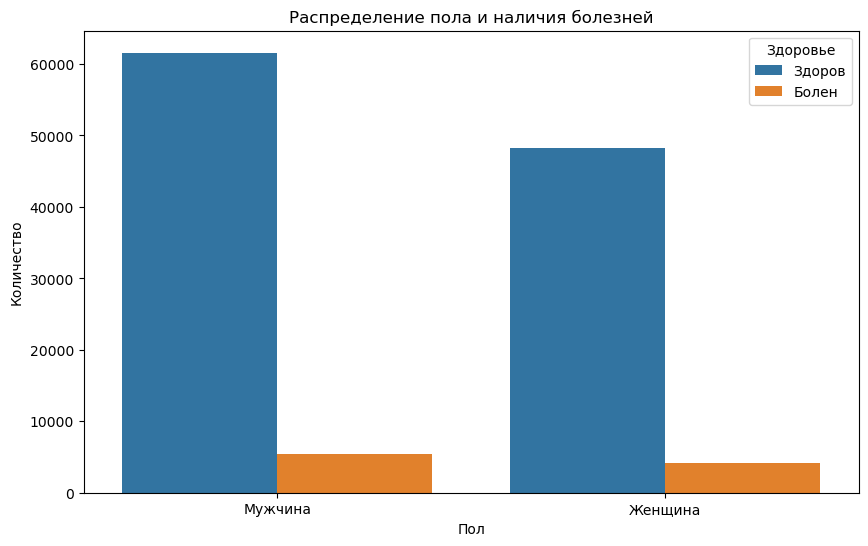

In [38]:
# Создание столбчатой диаграммы для распределения пола и наличия болезней
plt.figure(figsize=(10, 6))
sb.countplot(x=df_clean['gender'].replace({True: 'Мужчина', False: 'Женщина'}), hue='illness', data=df_clean)
plt.title('Распределение пола и наличия болезней')
plt.xlabel('Пол')
plt.ylabel('Количество')

# Добавление подписей
plt.legend(title='Здоровье', labels=['Здоров', 'Болен'])
plt.show()

Как и видим, что почти примерны одинаковы по уровня здоровья у мужчин и женщин. Лучше всего рассмотреть на скрипичной диаграммой

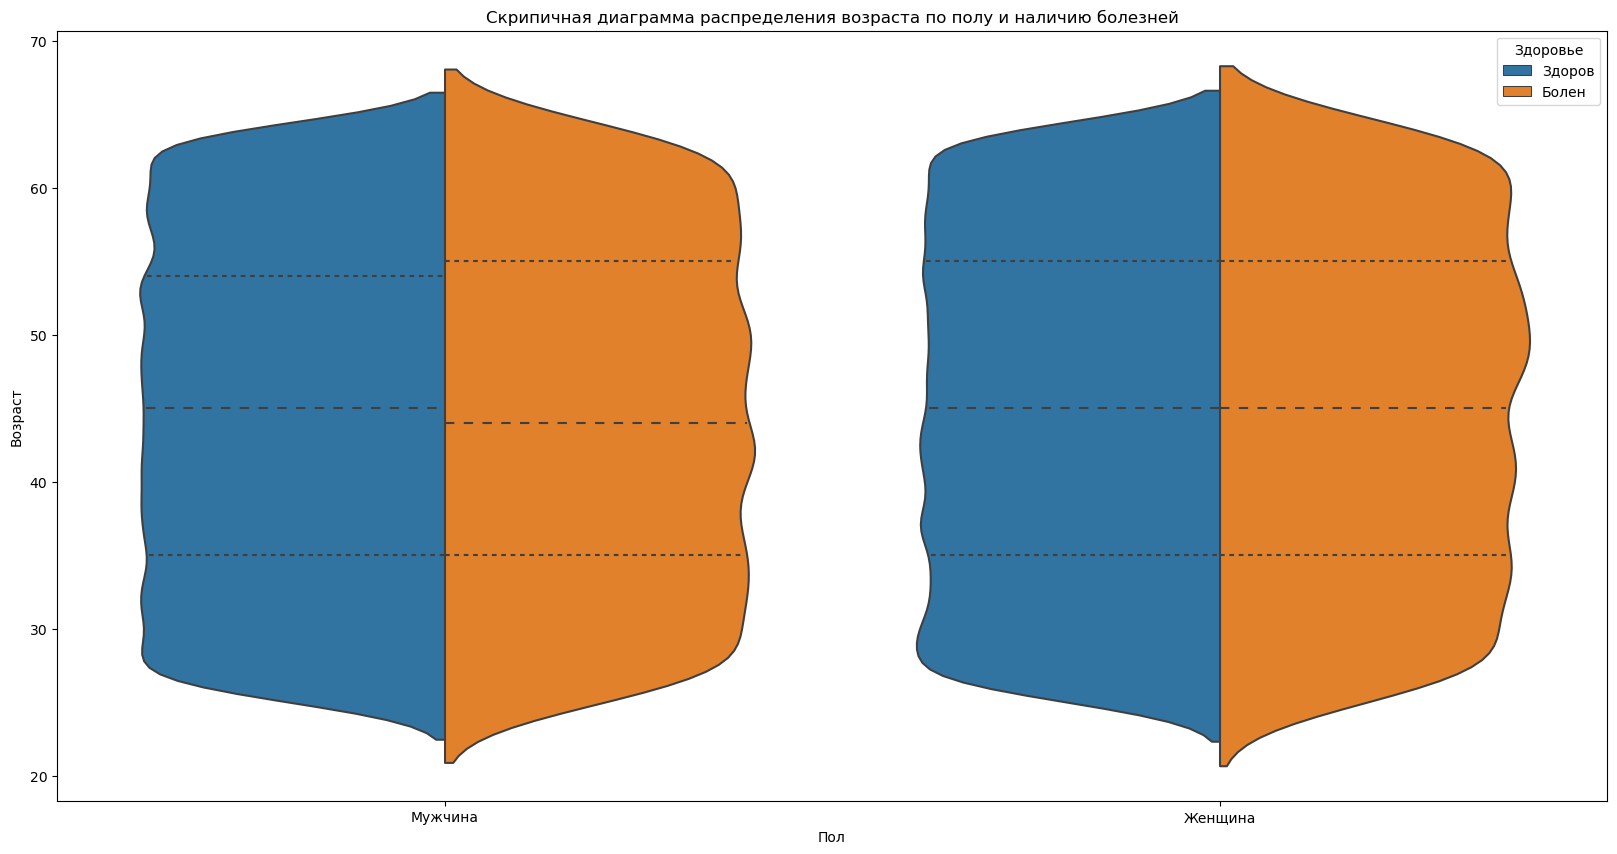

In [39]:
plt.figure(figsize=(20, 10))
sb.violinplot(
    x=df_clean['gender'].replace({True: 'Мужчина', False: 'Женщина'}), 
    y=df_clean['age'], 
    hue=df_clean['illness'].replace({True: 'Болен', False: 'Здоров'}), 
    split=True, 
    inner='quartile'
)
plt.title('Скрипичная диаграмма распределения возраста по полу и наличию болезней')
plt.xlabel('Пол')
plt.ylabel('Возраст')
# Добавление подписей
plt.legend(title='Здоровье')
plt.show()

Как и видим, что в молодом возрасте женщины реже заболевает нежели мужчин. А что если рассмотреть по группам возраста?

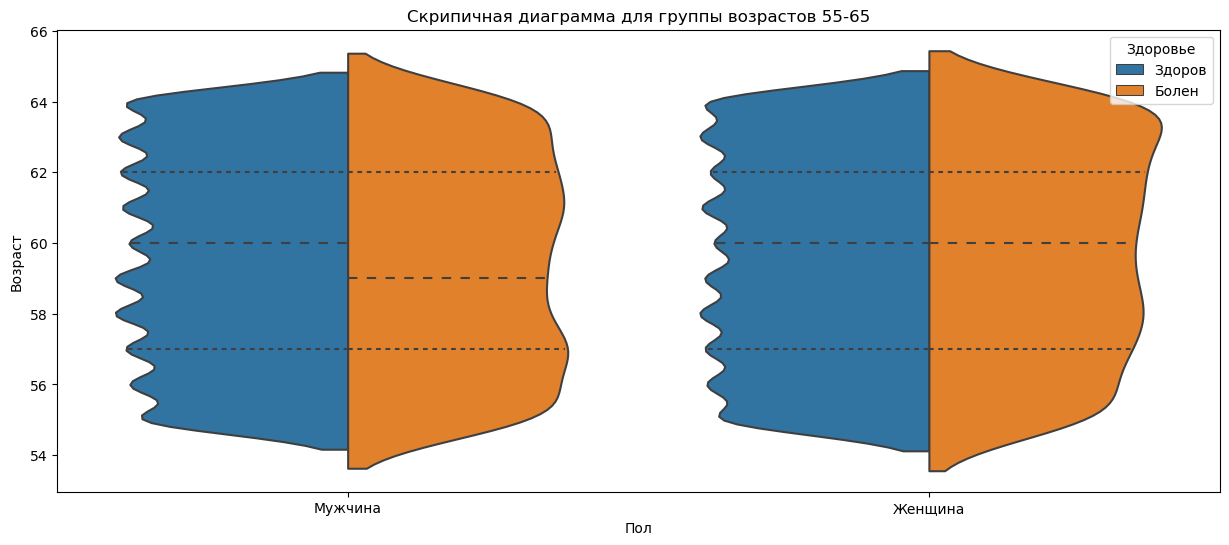

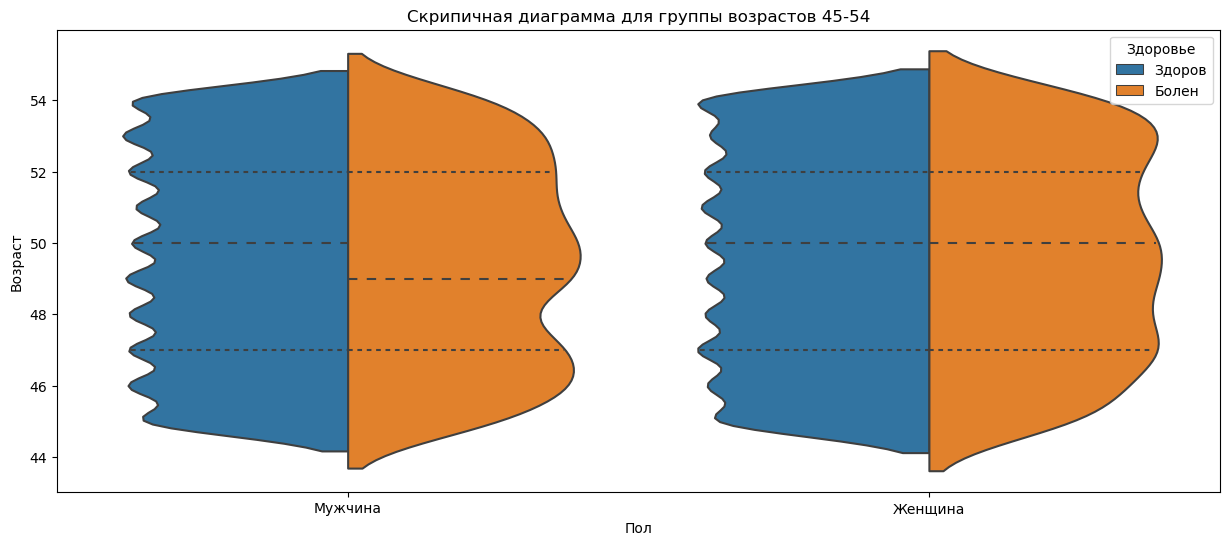

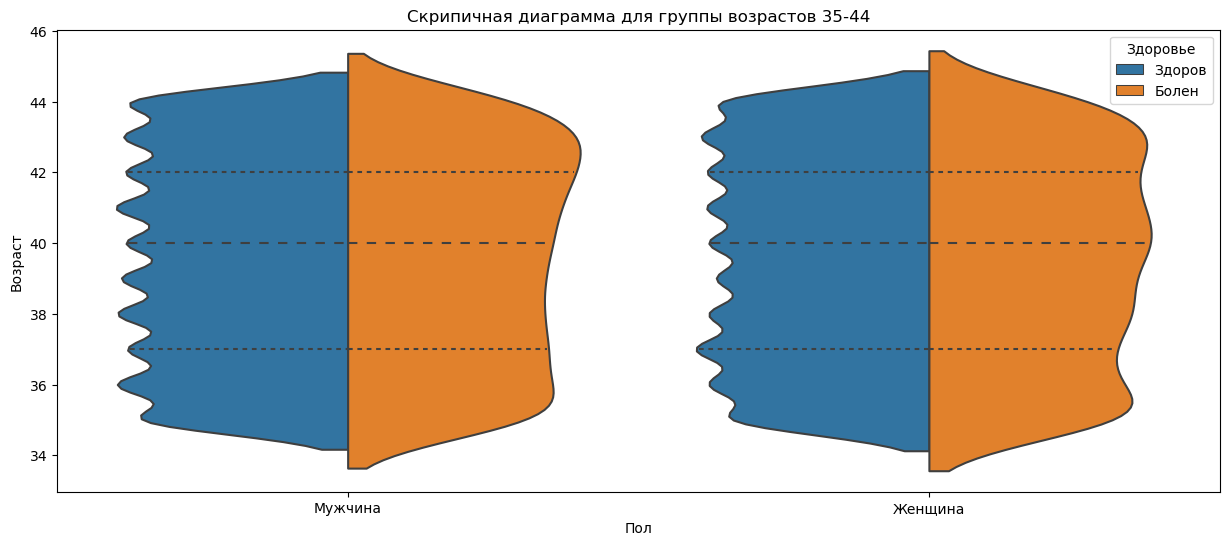

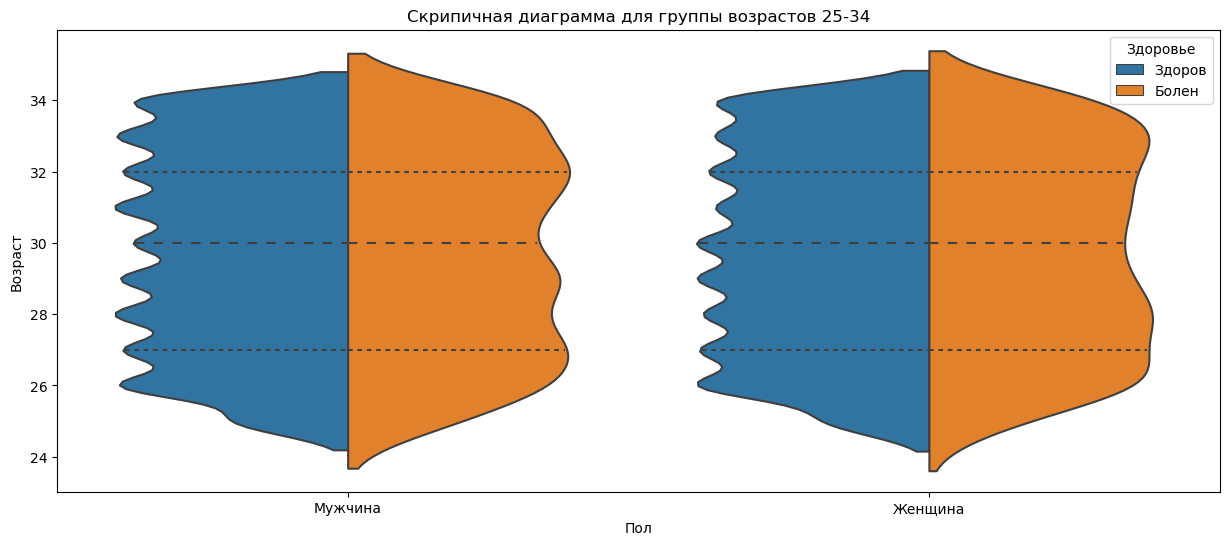

In [40]:
for age_group in df_clean['age_group'].unique().sort_values(ascending=False):
    plt.figure(figsize=(15, 6))
    sb.violinplot(
        x=df_clean['gender'].replace({True: 'Мужчина', False: 'Женщина'}), 
        y='age', 
        hue=df_clean['illness'].replace({True: 'Болен', False: 'Здоров'}), 
        split=True, 
        inner='quartile', 
        data=df_clean[df_clean['age_group'] == age_group]
    )
    plt.title(f'Скрипичная диаграмма для группы возрастов {age_group}')
    plt.xlabel('Пол')
    plt.ylabel('Возраст')
    plt.legend(title='Здоровье')
    plt.show()

По графику можно примерно поставить оценку по уровня заболеваемости. В преклонных возрастах женщины заболевают чаще мужчин. В остальном примерно одинаковы получилось